# [과제] 보스턴 주택가격 데이터를 활용하여, 규제가 없을떄, 리지, 라쏘, 엘라스틱넷 선형회귀를 수행하고 각각의 회귀계수 및 예측 성능을 비교하라

#### 테스트 사이즈: 0.3, random_state=42

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# 데이터 수집
from sklearn import datasets
boston = datasets.fetch_openml('boston')
boston

/opt/homebrew/lib/python3.11/site-packages/sklearn/datasets/_openml.py:292: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


{'data':         CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
 0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
 1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
 2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
 3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
 4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
 ..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
 501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
 502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
 503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
 504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
 505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   
 
      PTRATIO       B  LSTAT  
 0       15.3  396.90   4.98  
 1       17.8  396.90   9.14  
 2       

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
X = boston.data.to_numpy()
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
comp_df = pd.DataFrame(index=boston.feature_names + ['R2 socres'])
comp_df

""
CRIM
ZN
INDUS
CHAS
NOX
RM
AGE
DIS
RAD
TAX


## 1) 릿지 모델

In [13]:
model_Ridge = Ridge()
model_Ridge.fit(X_train, y_train)

Ridge()

In [14]:
y_pred = model_Ridge.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.7041586727559435


In [15]:
Ridge_coef = pd.Series(model_Ridge.coef_, index=boston.feature_names)
Ridge_coef

CRIM      -0.128427
ZN         0.036952
INDUS      0.017914
CHAS       2.932695
NOX       -7.848060
RM         4.063574
AGE       -0.017242
DIS       -1.271761
RAD        0.225494
TAX       -0.009381
PTRATIO   -0.827105
B          0.011988
LSTAT     -0.563474
dtype: float64

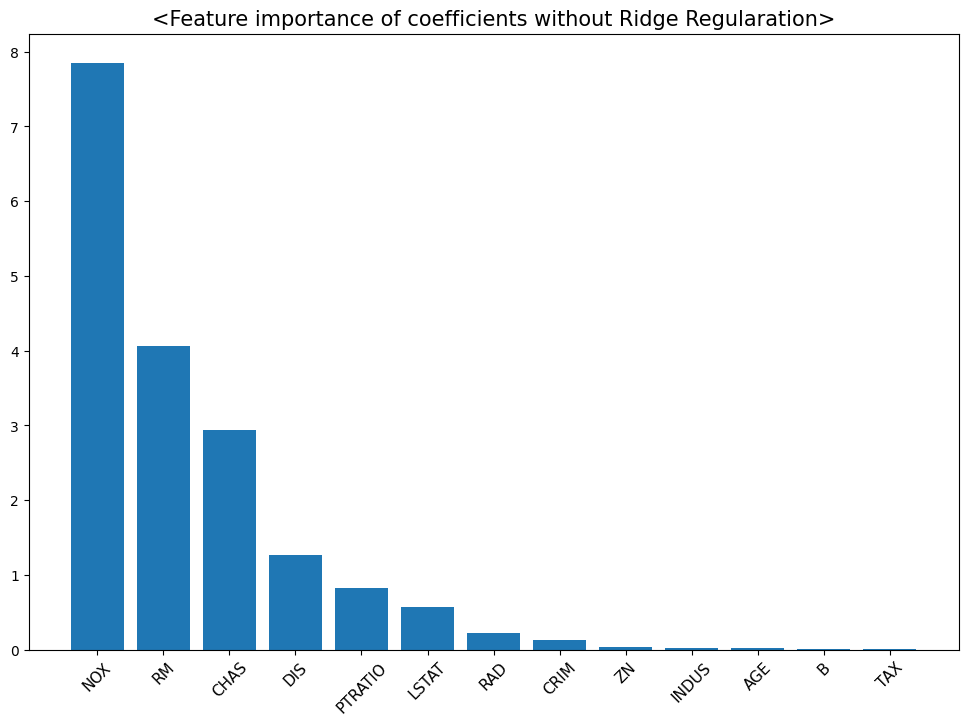

In [16]:
coef = pd.Series(np.abs(Ridge_coef), \
                index=boston.feature_names).sort_values(ascending=False)
coef

# 시각화
plt.figure(figsize=(12,8))
plt.title('<Feature importance of coefficients without Ridge Regularation>', \
    fontsize=15)
plt.bar(coef.index, coef.values)
plt.xticks(coef.index, rotation=45, fontsize=11);

## 2) 라쏘 모델

In [17]:
model_Lasso = Lasso()
model_Lasso.fit(X_train, y_train)

Lasso()

In [18]:
y_pred = model_Lasso.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2: ', r2)

r2:  0.655906082915434


In [19]:
Lasso_coef = pd.Series(model_Lasso.coef_, index=boston.feature_names).sort_values(ascending=False)
print(Lasso_coef)

RM         1.281317
RAD        0.191501
ZN         0.034667
AGE        0.011440
B          0.010832
INDUS     -0.000000
CHAS       0.000000
NOX       -0.000000
TAX       -0.009540
CRIM      -0.091916
DIS       -0.616021
PTRATIO   -0.703350
LSTAT     -0.779921
dtype: float64


RM         1.281317
LSTAT      0.779921
PTRATIO    0.703350
DIS        0.616021
RAD        0.191501
CRIM       0.091916
ZN         0.034667
AGE        0.011440
B          0.010832
TAX        0.009540
INDUS      0.000000
CHAS       0.000000
NOX        0.000000
dtype: float64


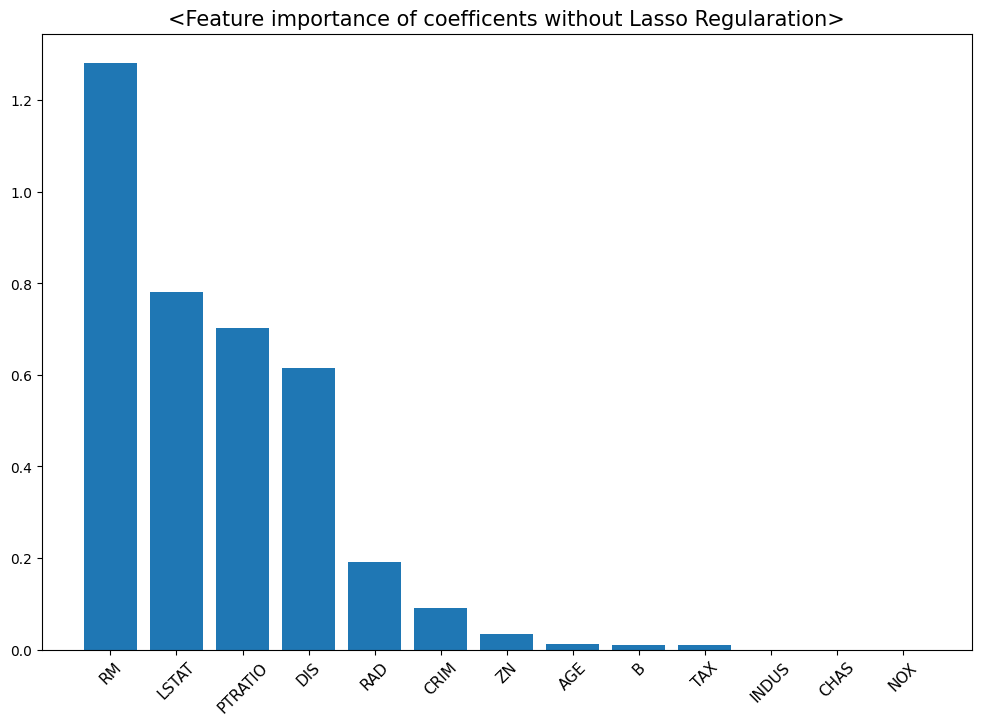

In [20]:
coef = np.abs(Lasso_coef)
coef = pd.Series(coef, index=boston.feature_names).sort_values(ascending=False)
print(coef)

# 시각화
plt.figure(figsize=(12,8))
plt.title('<Feature importance of coefficents without Lasso Regularation>',\
          fontsize=15)
plt.bar(coef.index, coef.values)
plt.xticks(coef.index, rotation=45, fontsize=11);

## 3) 엘라스틱넷 모델

In [21]:
model_ElasticNet = ElasticNet(l1_ratio=0.5)
model_ElasticNet.fit(X_train, y_train)

ElasticNet()

In [22]:
y_pred = model_ElasticNet.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

ElasticNet_coef = pd.Series(model_ElasticNet.coef_, index=boston.feature_names)
ElasticNet_coef

0.6590505847238239


CRIM      -0.110012
ZN         0.041841
INDUS     -0.000000
CHAS       0.000000
NOX       -0.000000
RM         1.055612
AGE        0.011628
DIS       -0.722866
RAD        0.244634
TAX       -0.011726
PTRATIO   -0.736719
B          0.010911
LSTAT     -0.793533
dtype: float64

RM         1.055612
LSTAT      0.793533
PTRATIO    0.736719
DIS        0.722866
RAD        0.244634
CRIM       0.110012
ZN         0.041841
TAX        0.011726
AGE        0.011628
B          0.010911
INDUS      0.000000
CHAS       0.000000
NOX        0.000000
dtype: float64


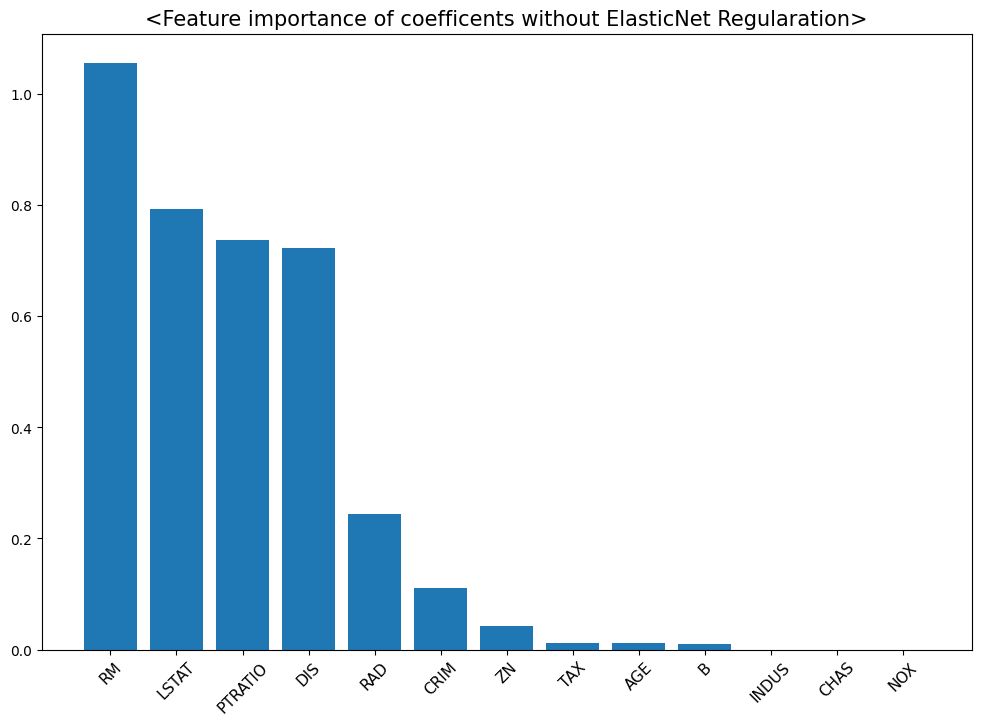

In [23]:
coef = np.abs(ElasticNet_coef)
coef = pd.Series(coef, index=boston.feature_names).sort_values(ascending=False)
print(coef)

# 시각화
plt.figure(figsize=(12,8))
plt.title('<Feature importance of coefficents without ElasticNet Regularation>',\
          fontsize=15)
plt.bar(coef.index, coef.values)
plt.xticks(coef.index, rotation=45, fontsize=11);